In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering, BisectingKMeans
from sklearn.metrics import silhouette_score
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import optuna
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import seaborn as sns

In [2]:
df_species = pd.read_csv('./dataset/species_dataset.csv')

In [3]:
df_species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   species_id          600 non-null    object 
 1   body_mass_kg        600 non-null    float64
 2   num_legs            600 non-null    int64  
 3   has_wings           600 non-null    int64  
 4   tail_length_cm      600 non-null    float64
 5   diet_type           600 non-null    object 
 6   eye_count           600 non-null    int64  
 7   skin_type           600 non-null    object 
 8   nocturnal           600 non-null    int64  
 9   avg_lifespan_years  600 non-null    float64
 10  has_venom           600 non-null    int64  
 11  social_behavior     600 non-null    object 
dtypes: float64(3), int64(5), object(4)
memory usage: 56.4+ KB


In [4]:
df_species['social_behavior'].unique()

array(['pair-living', 'solitary', 'group-living'], dtype=object)

In [5]:
df_species['skin_type'].unique()

array(['fur', 'scales', 'feathers', 'skin'], dtype=object)

In [6]:
df_species['diet_type'].unique()

array(['carnivore', 'herbivore', 'omnivore'], dtype=object)

In [7]:
df_species.head()

,species_id,body_mass_kg,num_legs,has_wings,tail_length_cm,diet_type,eye_count,skin_type,nocturnal,avg_lifespan_years,has_venom,social_behavior
0,SP000,59.934283,6,1,27.622702,carnivore,2,fur,0,118.957538,0,pair-living
1,SP001,47.234714,6,1,25.521165,carnivore,4,fur,0,121.226422,0,solitary
2,SP002,62.953771,8,1,50.794426,carnivore,2,fur,0,119.454890,0,pair-living
3,SP003,80.460597,2,1,46.476993,carnivore,4,fur,1,121.522981,0,solitary
4,SP004,45.316933,4,0,40.161889,herbivore,2,scales,0,120.060929,0,group-living


In [8]:
percentual_diet_type = df_species.value_counts('diet_type')/len(df_species) * 100
px.bar(percentual_diet_type, color=percentual_diet_type.index)

In [9]:
percentual_skin_type = df_species.value_counts('skin_type')/len(df_species) * 100
px.bar(percentual_skin_type, color=percentual_skin_type.index)

In [10]:
percentual_social_behavior = df_species.value_counts('social_behavior')/len(df_species) * 100
px.bar(percentual_social_behavior, color=percentual_social_behavior.index)

In [11]:
percentual_noturno = df_species.value_counts('nocturnal') / len(df_species) * 100
px.bar(percentual_noturno, color=percentual_noturno.index)

<Axes: xlabel='body_mass_kg', ylabel='Count'>

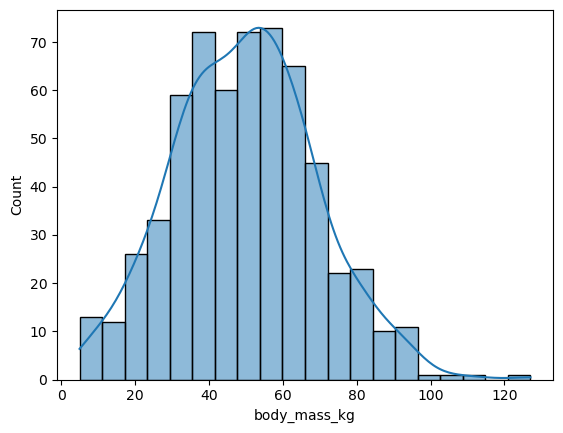

In [12]:
sns.histplot(df_species['body_mass_kg'], kde=True)

<Axes: xlabel='tail_length_cm', ylabel='Count'>

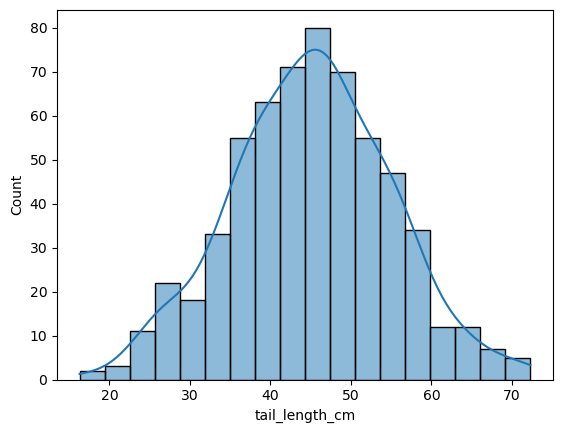

In [13]:
sns.histplot(df_species['tail_length_cm'], kde=True)

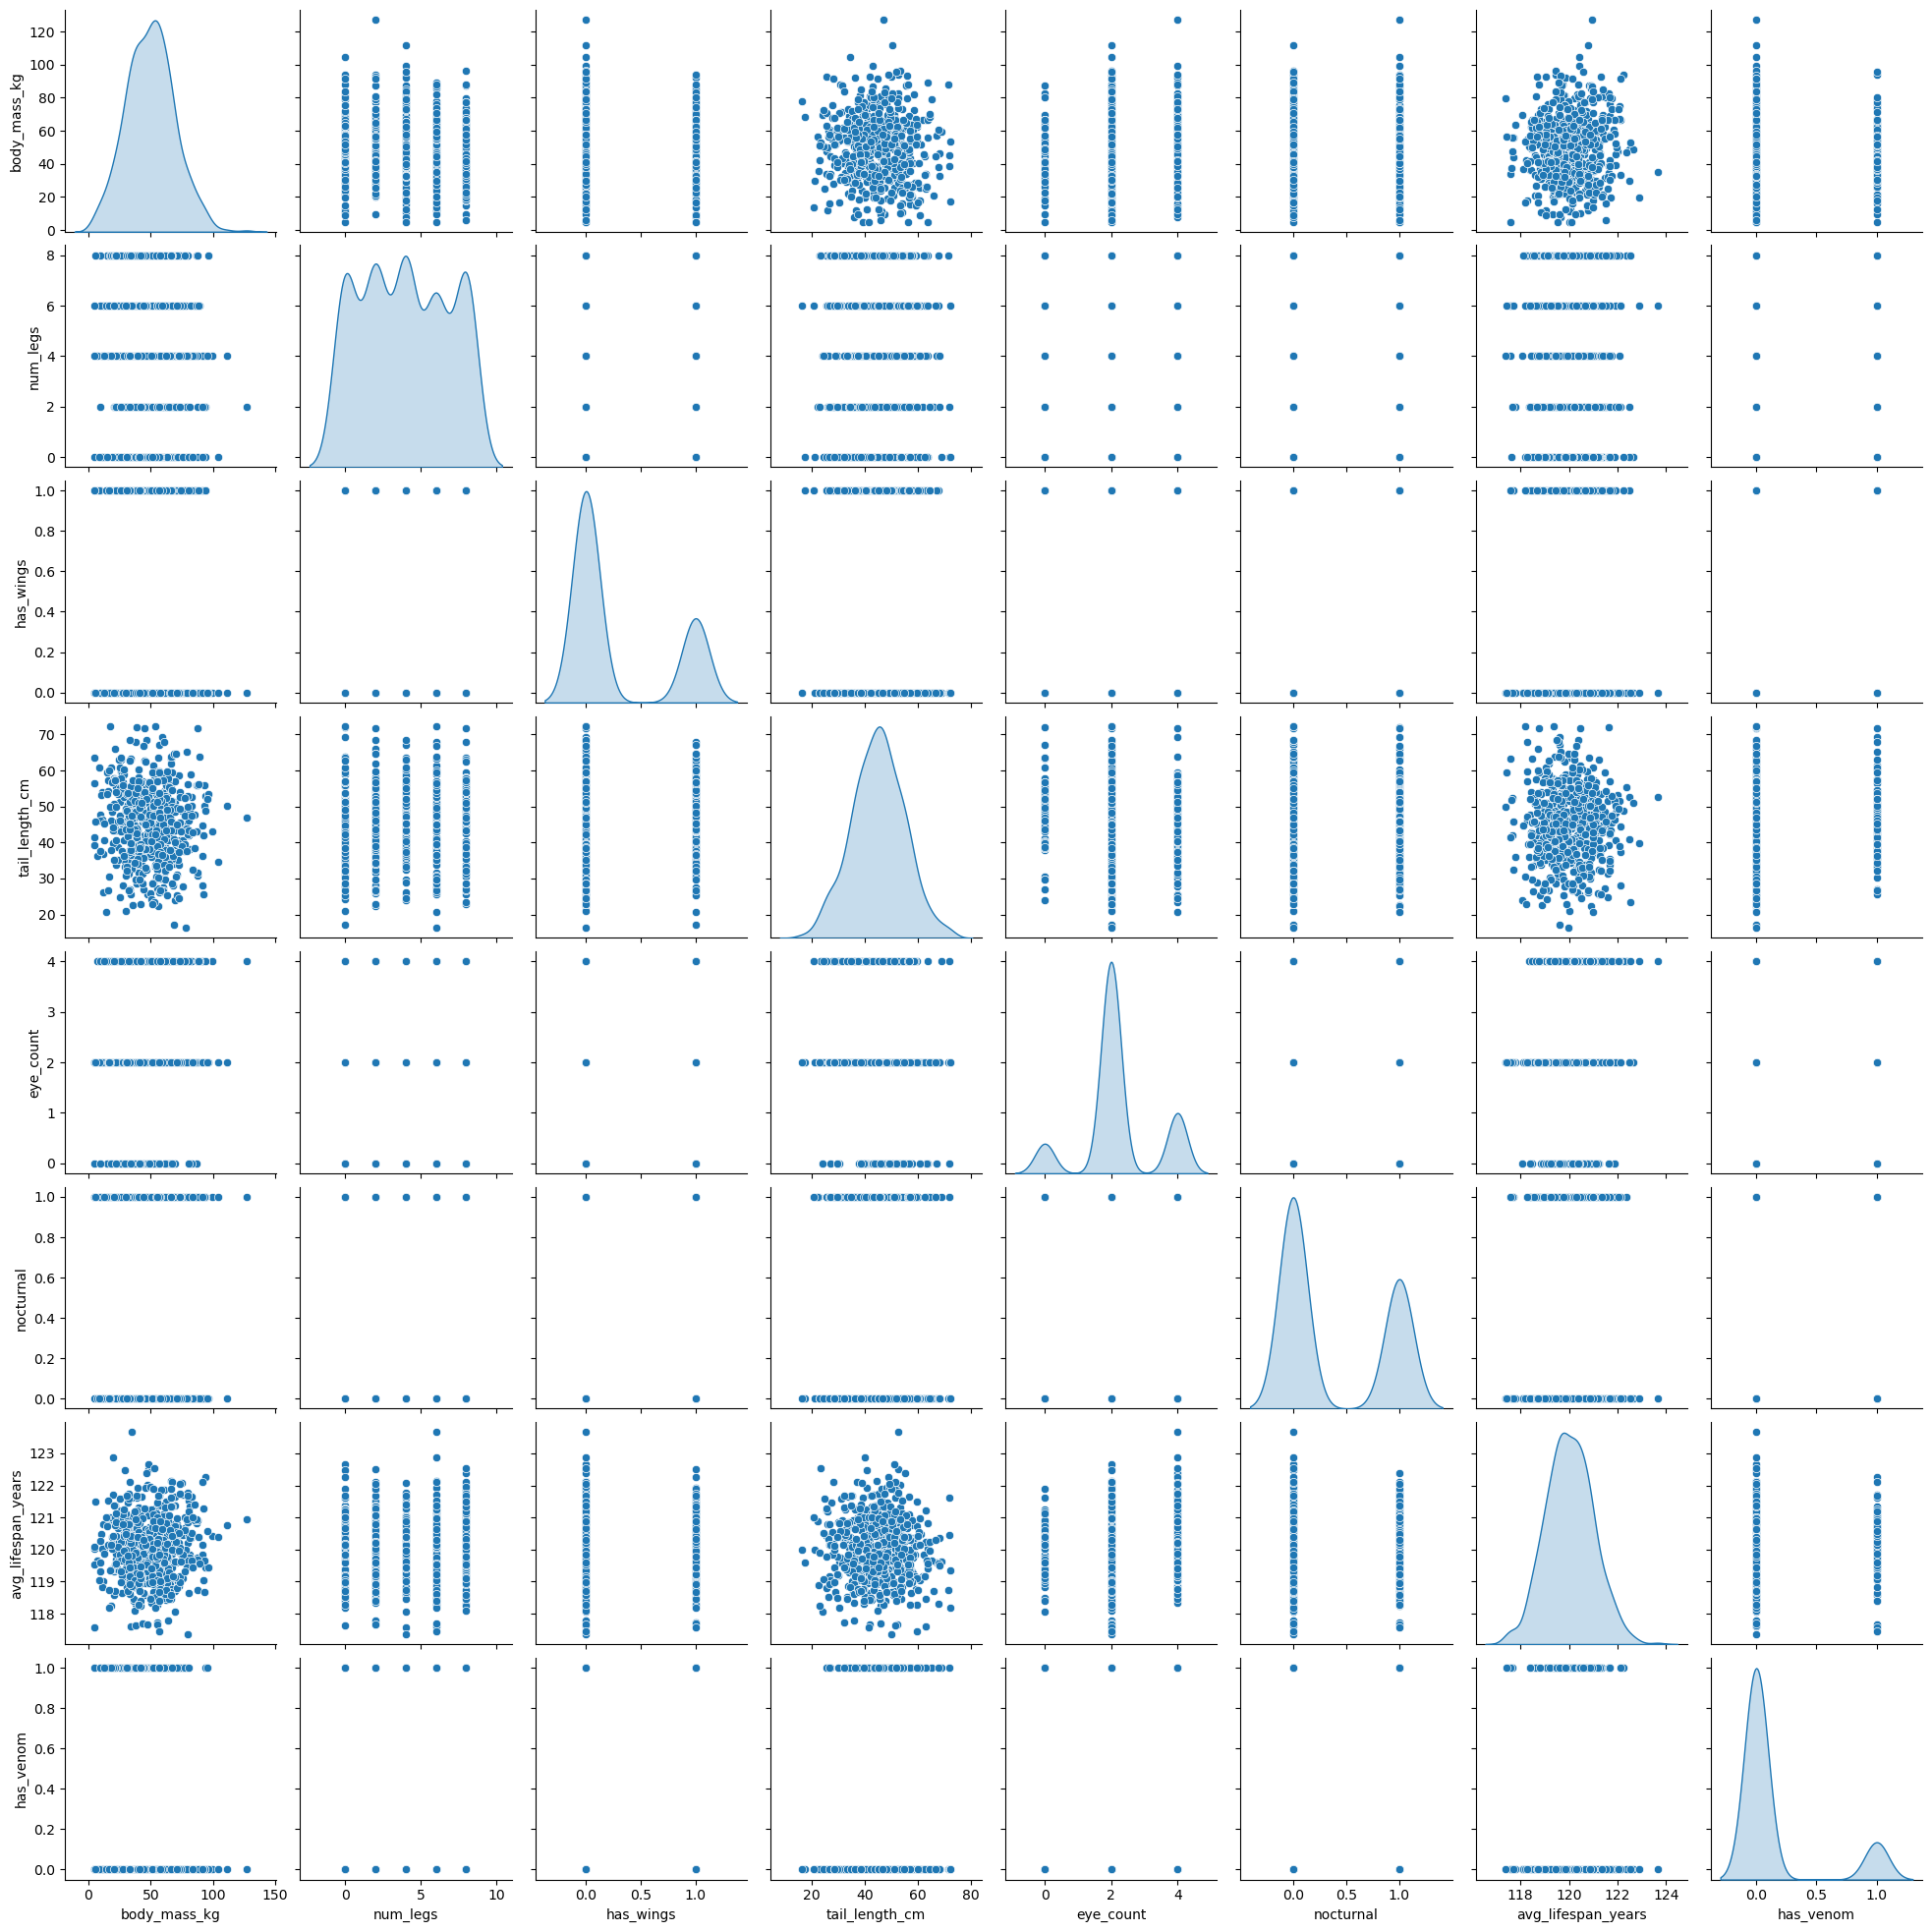

In [14]:
sns.pairplot(df_species,diag_kind='kde')

In [15]:
df_species['avg_lifespan_years'] = df_species['avg_lifespan_years'].astype('int64')
df_species['tail_length_cm'] = df_species['tail_length_cm'].astype('int64')
df_species['body_mass_kg'] = df_species['body_mass_kg'].astype('int64')


In [16]:
df_species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   species_id          600 non-null    object
 1   body_mass_kg        600 non-null    int64 
 2   num_legs            600 non-null    int64 
 3   has_wings           600 non-null    int64 
 4   tail_length_cm      600 non-null    int64 
 5   diet_type           600 non-null    object
 6   eye_count           600 non-null    int64 
 7   skin_type           600 non-null    object
 8   nocturnal           600 non-null    int64 
 9   avg_lifespan_years  600 non-null    int64 
 10  has_venom           600 non-null    int64 
 11  social_behavior     600 non-null    object
dtypes: int64(8), object(4)
memory usage: 56.4+ KB


In [17]:
df_species.head()

,species_id,body_mass_kg,num_legs,has_wings,tail_length_cm,diet_type,eye_count,skin_type,nocturnal,avg_lifespan_years,has_venom,social_behavior
0,SP000,59,6,1,27,carnivore,2,fur,0,118,0,pair-living
1,SP001,47,6,1,25,carnivore,4,fur,0,121,0,solitary
2,SP002,62,8,1,50,carnivore,2,fur,0,119,0,pair-living
3,SP003,80,2,1,46,carnivore,4,fur,1,121,0,solitary
4,SP004,45,4,0,40,herbivore,2,scales,0,120,0,group-living


In [18]:
X = df_species.copy()

X.drop(columns=['species_id'], axis=1, inplace=True)

In [19]:
numerical_features = ['body_mass_kg','num_legs','tail_length_cm',
                        'eye_count','avg_lifespan_years']

categorical_features = ['diet_type','skin_type','social_behavior']

preprocess = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(),categorical_features),
        ('num',StandardScaler(),numerical_features)
    ]
)

df_processed = preprocess.fit_transform(X)

In [20]:
df_processed.shape

(600, 15)

In [21]:
def hierarchical_aglomerative_objective(trial):
    
    n_clusters = trial.suggest_int("n_clusters", 10, 200)
    linkage = trial.suggest_categorical('linkage', ['ward', 'complete', 'average', 'single'])

    hierquical_model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    y_predict = hierquical_model.fit_predict(df_processed)

    silhouette = silhouette_score(df_processed,y_predict)

    return silhouette

def hierarchical_divisive_objective(trial):
    
    n_clusters = trial.suggest_int('n_clusters', 10, 200)
    divisive_model = BisectingKMeans(n_clusters=n_clusters)

    y_predict = divisive_model.fit_predict(df_processed)
    silhouette_avg = silhouette_score(df_processed, y_predict)

    return silhouette_avg

In [22]:
search_space_ag = {'n_clusters': list(range(10,200)),'linkage':['ward', 'complete', 'average', 'single']}
sampler_ag = optuna.samplers.GridSampler(search_space=search_space_ag)
study_ag = optuna.create_study(sampler=sampler_ag,direction='maximize')


[I 2025-12-27 21:18:04,755] A new study created in memory with name: no-name-dfd916bc-6b48-40fd-9454-09bbfca794a6


In [23]:
search_space_div = {'n_clusters': list(range(10,200)),'linkage':['ward', 'complete', 'average', 'single']}
sampler_div = optuna.samplers.GridSampler(search_space=search_space_div)
study_div = optuna.create_study(sampler=sampler_div,direction='maximize')

[I 2025-12-27 21:18:04,760] A new study created in memory with name: no-name-928abd3a-16be-4941-bc2b-476409453086


In [24]:
study_ag.optimize(hierarchical_aglomerative_objective, n_trials=len(search_space_ag['n_clusters']) * len(search_space_ag['linkage']))

[I 2025-12-27 21:18:04,787] Trial 0 finished with value: -0.18846658197927088 and parameters: {'n_clusters': 188, 'linkage': 'single'}. Best is trial 0 with value: -0.18846658197927088.
[I 2025-12-27 21:18:04,803] Trial 1 finished with value: -0.16767150719987114 and parameters: {'n_clusters': 23, 'linkage': 'single'}. Best is trial 1 with value: -0.16767150719987114.
[I 2025-12-27 21:18:04,811] Trial 2 finished with value: -0.12041479292898118 and parameters: {'n_clusters': 15, 'linkage': 'single'}. Best is trial 2 with value: -0.12041479292898118.
[I 2025-12-27 21:18:04,823] Trial 3 finished with value: 0.09022006977656954 and parameters: {'n_clusters': 50, 'linkage': 'ward'}. Best is trial 3 with value: 0.09022006977656954.
[I 2025-12-27 21:18:04,834] Trial 4 finished with value: 0.06657373842974704 and parameters: {'n_clusters': 63, 'linkage': 'complete'}. Best is trial 3 with value: 0.09022006977656954.
[I 2025-12-27 21:18:04,854] Trial 5 finished with value: 0.033121956480066314 

In [25]:
# Executar estudo do Optuna Divisivo
study_div.optimize(hierarchical_divisive_objective, n_trials=len(search_space_ag['n_clusters']) * len(search_space_ag['linkage']))

[I 2025-12-27 21:19:38,178] Trial 0 finished with value: 0.0083928798300659 and parameters: {'n_clusters': 188}. Best is trial 0 with value: 0.0083928798300659.
[I 2025-12-27 21:19:38,196] Trial 1 finished with value: 0.05864675423151617 and parameters: {'n_clusters': 23}. Best is trial 1 with value: 0.05864675423151617.
[I 2025-12-27 21:19:38,222] Trial 2 finished with value: 0.055814178426326785 and parameters: {'n_clusters': 15}. Best is trial 1 with value: 0.05864675423151617.
[I 2025-12-27 21:19:38,251] Trial 3 finished with value: 0.042297133488935 and parameters: {'n_clusters': 50}. Best is trial 1 with value: 0.05864675423151617.
[I 2025-12-27 21:19:38,290] Trial 4 finished with value: 0.03310610749416064 and parameters: {'n_clusters': 63}. Best is trial 1 with value: 0.05864675423151617.
[I 2025-12-27 21:19:38,324] Trial 5 finished with value: 0.055202539985531957 and parameters: {'n_clusters': 19}. Best is trial 1 with value: 0.05864675423151617.
[I 2025-12-27 21:19:38,409] T

In [26]:
best_params_ag = study_ag.best_params
best_value_ag = study_ag.best_value
print(f"Clusters = {best_params_ag['n_clusters']}")
print(f"Melhor valor (Aglomerativo): {best_value_ag}")

Clusters = 199
Melhor valor (Aglomerativo): 0.16650554803590142


In [27]:
best_params_div = study_div.best_params
best_value_div = study_div.best_value
print(f"Clusters = {best_params_div['n_clusters']}")
print(f"Melhor valor (Divisivo): {best_value_div}")

Clusters = 11
Melhor valor (Divisivo): 0.07103253337683488


In [28]:
best_model = AgglomerativeClustering(
    n_clusters=best_params_ag['n_clusters'],
    linkage=best_params_ag['linkage']
)
best_model.fit(df_processed)

,n_clusters,199
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [29]:
best_model.labels_

array([ 12,  42,  36,  38,  25,  51, 115,  36, 112,   8, 104,  56, 172,
       162,  59,  78,  92,  36,  46, 110, 128,  81,  49,  96,  30,  35,
       198,  63,  52, 113,  32, 189,  93,  25,  90,  98, 138, 197, 162,
       121, 145,  11,  99,  12, 177, 122, 120, 154,  69,  80,  87, 174,
       138,  38, 146,  21, 198, 145, 187,  50,   6,  89,  88, 158, 190,
        10,  31,  41,  56,  78,  90,  14, 122, 147,   4, 190,   6,  47,
        89, 194, 179, 148, 129,  60, 110, 106, 168,  49,  45,  55,  73,
        16,   3,  60,  26,  91, 127,  25, 150,  72,   0,   7,  52, 130,
        57,  26,  48,   2, 132,  11, 165,  92,  85,  16, 104, 120, 146,
        76,  18,  44,  36, 188, 164,  77,  82,  83, 106,  66,  85,  57,
       118,   5,  66,  13,  24,  62,  95, 122, 131, 158,  35, 175,  52,
         1,  42, 161, 194, 124,  29,  97,   2, 112,  97,  13, 145,  92,
        18, 125,   5,  36, 155, 115,  64,  78,  27,   2,  36, 166,  91,
        77, 179,  32,  71,  46,  43, 103,  19,  58,  28,  48,  6

In [30]:
df_species['cluster'] = best_model.labels_

In [31]:
df_species.head()

,species_id,body_mass_kg,num_legs,has_wings,tail_length_cm,diet_type,eye_count,skin_type,nocturnal,avg_lifespan_years,has_venom,social_behavior,cluster
0,SP000,59,6,1,27,carnivore,2,fur,0,118,0,pair-living,12
1,SP001,47,6,1,25,carnivore,4,fur,0,121,0,solitary,42
2,SP002,62,8,1,50,carnivore,2,fur,0,119,0,pair-living,36
3,SP003,80,2,1,46,carnivore,4,fur,1,121,0,solitary,38
4,SP004,45,4,0,40,herbivore,2,scales,0,120,0,group-living,25


In [32]:
fig = optuna.visualization.plot_optimization_history(study_ag)
fig.show()

In [33]:
# Treinar modelo com Scipy
modelo_de = linkage(df_processed, method=best_params_ag['linkage'], optimal_ordering=True)

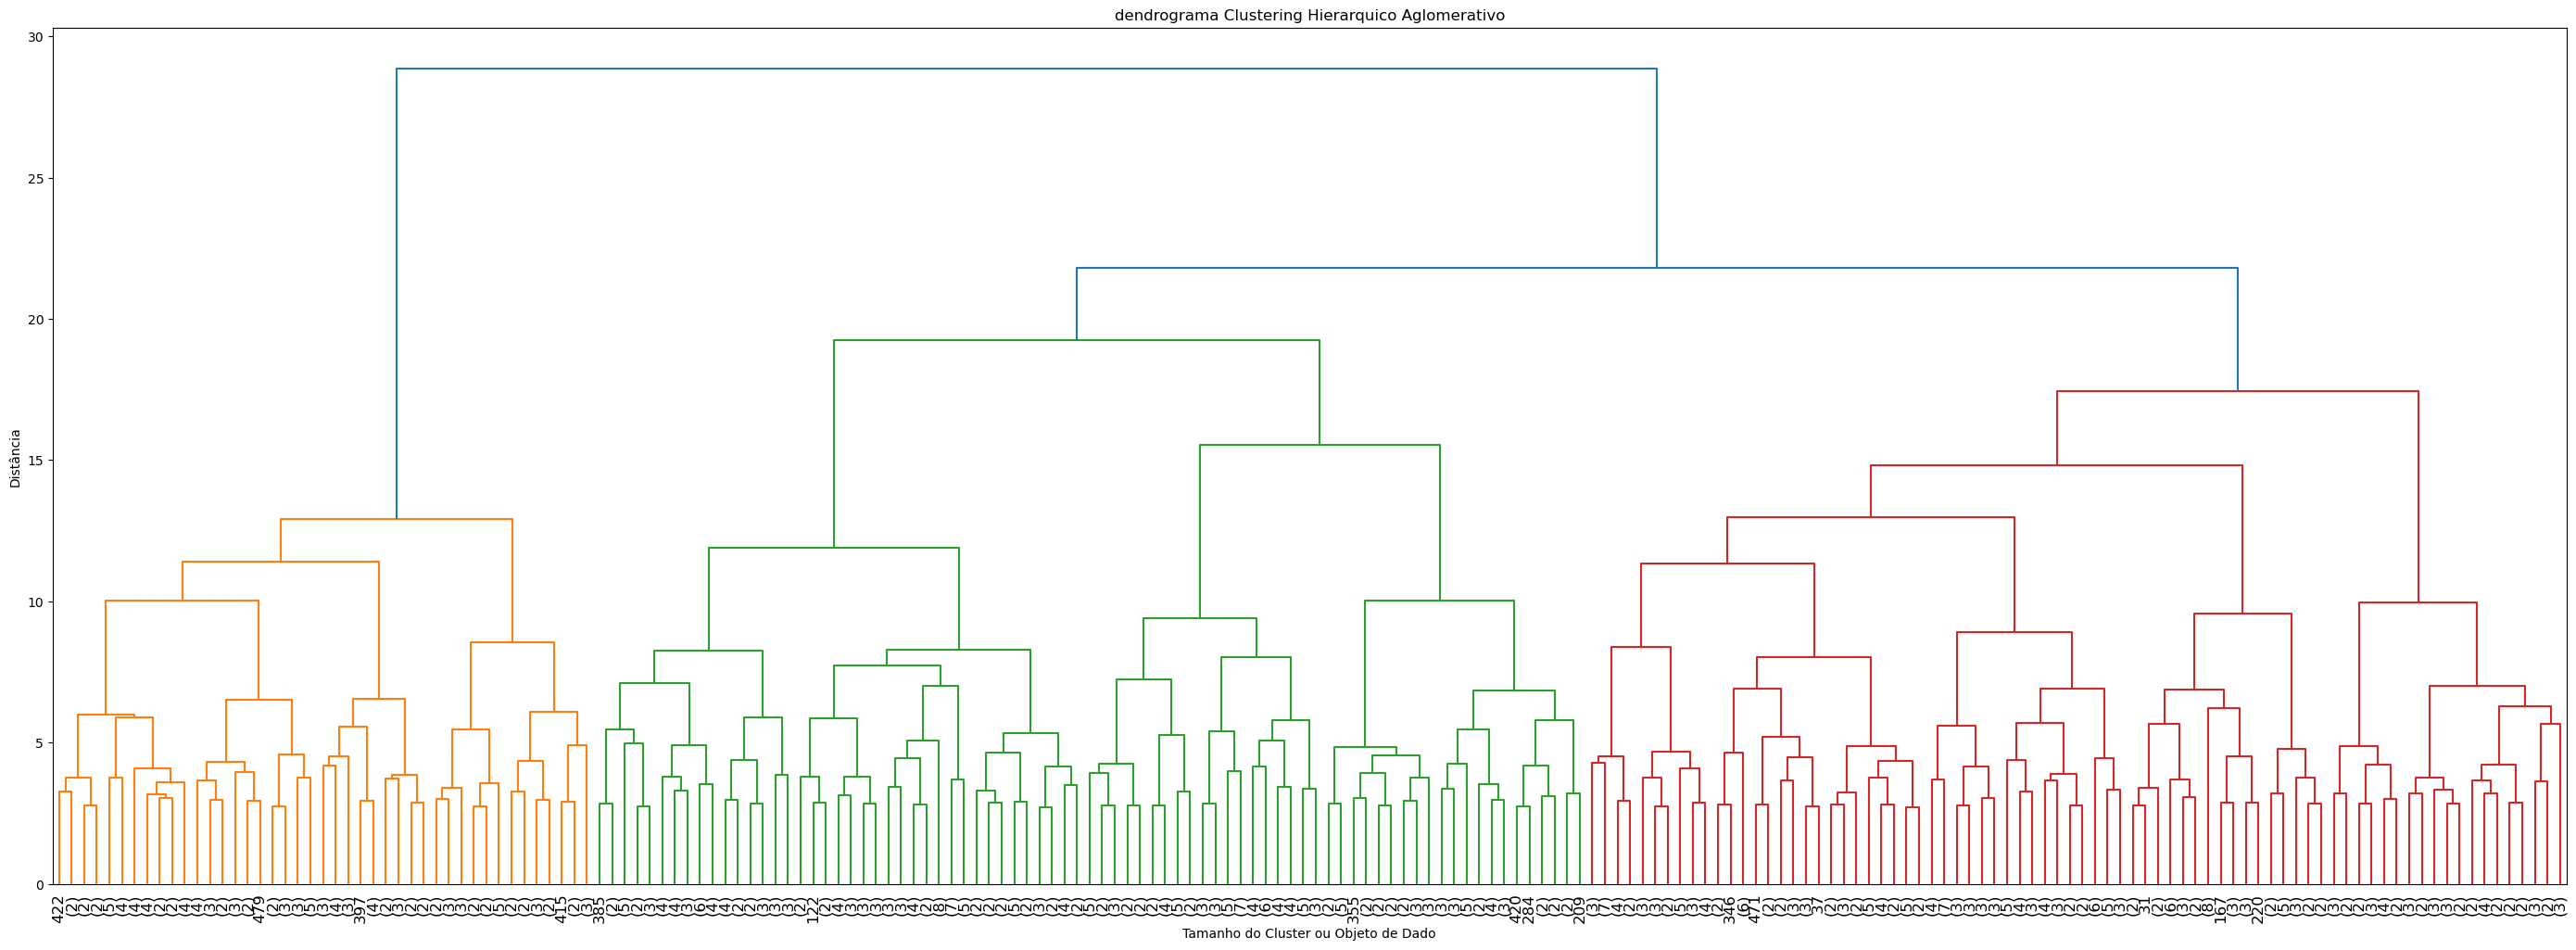

In [34]:
plt.figure(figsize=(35, 12))
dendrogram(modelo_de, truncate_mode='lastp', p=200, leaf_rotation=90, leaf_font_size=12)
plt.title('dendrograma Clustering Hierarquico Aglomerativo')
plt.xlabel('Tamanho do Cluster ou Objeto de Dado')
plt.ylabel('Distância')
plt.show()

In [35]:
clusters_de_scipy = cut_tree(modelo_de, height=1)
len(np.unique(clusters_de_scipy))

551

In [36]:
px.scatter(df_species,x='body_mass_kg',y='diet_type', color='cluster')

In [37]:
df_species.head()

,species_id,body_mass_kg,num_legs,has_wings,tail_length_cm,diet_type,eye_count,skin_type,nocturnal,avg_lifespan_years,has_venom,social_behavior,cluster
0,SP000,59,6,1,27,carnivore,2,fur,0,118,0,pair-living,12
1,SP001,47,6,1,25,carnivore,4,fur,0,121,0,solitary,42
2,SP002,62,8,1,50,carnivore,2,fur,0,119,0,pair-living,36
3,SP003,80,2,1,46,carnivore,4,fur,1,121,0,solitary,38
4,SP004,45,4,0,40,herbivore,2,scales,0,120,0,group-living,25


In [38]:
print("=" * 60)
print("ANÁLISE DESCRITIVA DOS CLUSTERS")
print("=" * 60)

for cluster_id in sorted(df_species['cluster'].unique()):
    cluster_data = df_species[df_species['cluster'] == cluster_id]
    
    print(f"\n{'='*60}")
    print(f"CLUSTER {cluster_id}")
    print(f"Tamanho: {len(cluster_data)} espécies")
    print(f"{'='*60}")
    
    print("\n📊 CARACTERÍSTICAS NUMÉRICAS (Média):")
    numeric_cols = ['body_mass_kg', 'num_legs', 'tail_length_cm', 
                    'eye_count', 'avg_lifespan_years']
    for col in numeric_cols:
        print(f"  {col}: {cluster_data[col].mean():.2f}")
    
    print("\n🏷️ CARACTERÍSTICAS CATEGÓRICAS (Moda):")
    categorical_cols = ['diet_type', 'skin_type', 'social_behavior']
    for col in categorical_cols:
        mode_value = cluster_data[col].mode()[0] if len(cluster_data[col].mode()) > 0 else 'N/A'
        percentage = (cluster_data[col] == mode_value).sum() / len(cluster_data) * 100
        print(f"  {col}: {mode_value} ({percentage:.1f}%)")
    
    print("\n✅ CARACTERÍSTICAS BINÁRIAS:")
    binary_cols = ['has_wings', 'nocturnal', 'has_venom']
    for col in binary_cols:
        percentage = cluster_data[col].mean() * 100
        print(f"  {col}: {percentage:.1f}% das espécies")

ANÁLISE DESCRITIVA DOS CLUSTERS

CLUSTER 0
Tamanho: 7 espécies

📊 CARACTERÍSTICAS NUMÉRICAS (Média):
  body_mass_kg: 35.29
  num_legs: 7.14
  tail_length_cm: 46.57
  eye_count: 2.00
  avg_lifespan_years: 118.43

🏷️ CARACTERÍSTICAS CATEGÓRICAS (Moda):
  diet_type: herbivore (57.1%)
  skin_type: feathers (100.0%)
  social_behavior: group-living (100.0%)

✅ CARACTERÍSTICAS BINÁRIAS:
  has_wings: 0.0% das espécies
  nocturnal: 28.6% das espécies
  has_venom: 28.6% das espécies

CLUSTER 1
Tamanho: 7 espécies

📊 CARACTERÍSTICAS NUMÉRICAS (Média):
  body_mass_kg: 50.71
  num_legs: 5.43
  tail_length_cm: 38.14
  eye_count: 2.00
  avg_lifespan_years: 119.71

🏷️ CARACTERÍSTICAS CATEGÓRICAS (Moda):
  diet_type: omnivore (85.7%)
  skin_type: feathers (100.0%)
  social_behavior: solitary (100.0%)

✅ CARACTERÍSTICAS BINÁRIAS:
  has_wings: 42.9% das espécies
  nocturnal: 42.9% das espécies
  has_venom: 0.0% das espécies

CLUSTER 2
Tamanho: 8 espécies

📊 CARACTERÍSTICAS NUMÉRICAS (Média):
  body_mass_